In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(ride, city, on="city" )

# Display the data table for preview
city_ride.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban


## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [2]:
avg_fare = city_ride.groupby("city")["fare"].mean()
avg_fare.head(3)

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Name: fare, dtype: float64

In [3]:
riders = city_ride.groupby("city")["ride_id"].count()
riders.head(3)

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Name: ride_id, dtype: int64

In [4]:
city_type = city_ride.drop_duplicates(subset="city", keep="first").set_index("city")["type"]
city_type.head(5)

city
Lake Jonathanshire    Urban
South Michelleport    Urban
Port Samanthamouth    Urban
Rodneyfort            Urban
South Jack            Urban
Name: type, dtype: object

In [5]:
drivers = city_ride.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']
drivers.head(5)

city
Lake Jonathanshire     5
South Michelleport    72
Port Samanthamouth    57
Rodneyfort            34
South Jack            46
Name: driver_count, dtype: int64

In [6]:
city_details = pd.DataFrame({"Average Fare per City":avg_fare,
                 "Number of Rides": riders,
                 "Number of Drivers": drivers,
                 "City Type": city_type
                })
city_details.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


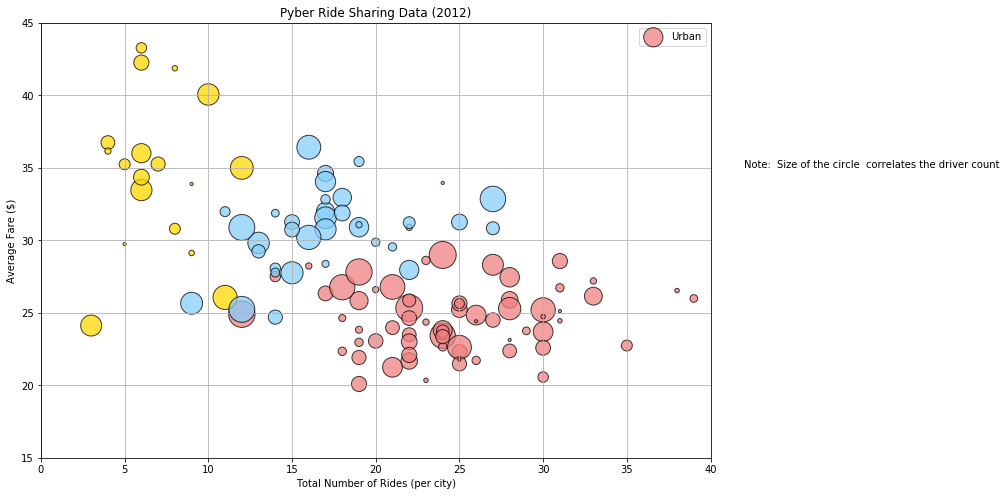

In [34]:
x = city_details["Number of Rides"]
y = city_details["Average Fare per City"]
s = city_details["Number of Drivers"]
lst = city_details["City Type"]

plt.figure(figsize=(12,8))

def pltcolors(lst):
    cols=[]
    for l in lst:
        if l == "Rural":
            cols.append("gold")
        elif l == "Suburban":
            cols.append("lightskyblue")
        else:
            cols.append("lightcoral")
    return cols

cols = pltcolors(lst)

plt.scatter(x=x, y=y, s= 10*drivers, c=cols, edgecolors = "black", alpha = 0.75)
plt.grid(axis="both")
plt.xlim(0,40,5)
plt.ylim(15,45,5)
plt.title("Pyber Ride Sharing Data (2012)")
plt.legend(city_details["City Type"])
plt.text(42,35,s="Note:  Size of the circle  correlates the driver count")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")


plt.savefig("PyberRideSharingData.png")

plt.show()

## Total Fares by City Type

In [22]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [23]:
fares_by_type = city_ride.groupby("type")["type", "fare", "ride_id","driver_count"]
fares_by_type.head(2)

,type,fare,ride_id,driver_count
0,Urban,13.83,5739410935873,5
1,Urban,31.25,4441251834598,5
1625,Suburban,27.79,6653622887913,11
1626,Suburban,30.38,2281522828169,11
2250,Rural,43.22,1076079536213,9
2251,Rural,58.55,8004803682564,9


In [24]:
total_fares = fares_by_type.sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

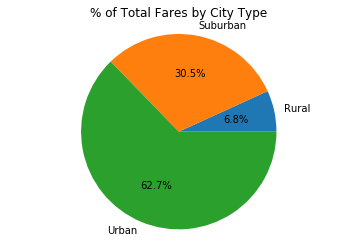

In [25]:
fare_labels = total_fares.index
fig1, ax1 = plt.subplots()
ax1.pie(total_fares, labels=fare_labels, autopct = "%1.1f%%")
ax1.axis('equal')  
plt.title('% of Total Fares by City Type')

plt.savefig("total_fares.png")
plt.show()

## Total Rides by City Type

In [26]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [27]:
total_rides = fares_by_type.count()["ride_id"]
total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

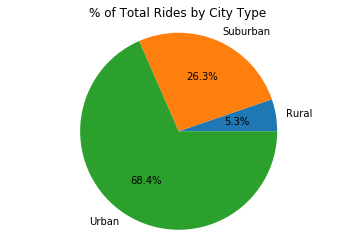

In [28]:
rides_labels = total_rides.index
fig2, ax1 = plt.subplots()
ax1.pie(total_rides, labels=rides_labels, autopct = "%1.1f%%")
ax1.axis('equal')  
plt.title('% of Total Rides by City Type')

plt.savefig("total_rides.png")
plt.show()

## Total Drivers by City Type

In [29]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [30]:
total_drivers = fares_by_type.sum()["driver_count"]
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

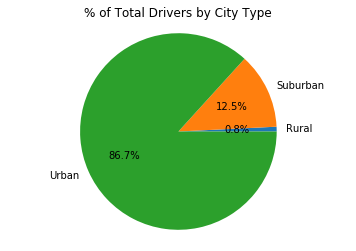

In [31]:
drivers_labels = total_drivers.index
fig3, ax1 = plt.subplots()
ax1.pie(total_drivers, labels=drivers_labels, autopct = "%1.1f%%")
ax1.axis('equal')  
plt.title('% of Total Drivers by City Type')

plt.savefig("total_drivers.png")
plt.show()

## OBSERVATIONS

In [33]:
# Observation 1:
# Average fare for Rural rides are greater than Urban and Suburban.  
# This would mean the distance travelled using Pyber in Rural areas are longer.

# Observation 2:
# 86% of the drivers are in Urban settings.

#Observation 3:
# 68% of the rides are in Urban settings.
